Examination, track 2
===

Selected assignment: Salary Prediction

Dataset information
---
Source: http://archive.ics.uci.edu/dataset/2/adult

Detailed documentation is available in the resource above. The columns and their content are:

- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


Enviroment and data setup
---
To get prepared for analysing the data:
- Install package dependencies
- Import packages
- Load the CSV data and merge into a single DataFrame
- Clean the data from empty values

In [24]:
# The dataset comes in a public repository, so we can use the ucimlrepo package to download it
%pip install ucimlrepo

# For plotting, install the seaborn package
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [25]:
# Alternative way to load the dataset:
# Download and unzip from: http://archive.ics.uci.edu/dataset/2/adult
#
# Column names are not included in the dataset, so we need to add them manually
#colnames = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]
#
# Assuming running Kaggle, the dataset is loaded from the input folder 
#df = pd.read_csv('/kaggle/input/datasetkaggle/adult.csv', names=colnames, header=None)


from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
#print(adult.metadata) 
  
# variable information 
#print(adult.variables) 


In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df_raw = pd.concat([X, y], axis=1)

# Add a binary (0/1) value column to indicate if the income is above 50k
df_raw['above-50k'] = df_raw['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
#df_raw['above-50k'].value_counts()
df_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,above-50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [27]:
df_cleaned = df_raw.dropna()
print('Rows in the full dataset:', df_raw.shape[0])
print('Rows in the cleaned dataset:', df_cleaned.shape[0])


Rows in the full dataset: 48842
Rows in the cleaned dataset: 47621


Considering the low number of dropped rows after aggressivly removing all rows with null values, go for the simple approach

In [28]:
print(df_cleaned.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
above-50k          int64
dtype: object


The data types works as is without further convertion

In [29]:
# Investigate the unique values of the 'education' and 'education-num' columns
df_cleaned[['education', 'education-num']].drop_duplicates().sort_values(by='education-num')

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


## Ask 10 questions about the dataset and answer them using the data


#### Question 1: What is the income distribution among different age groups?

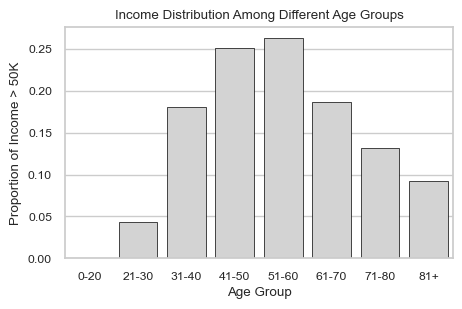

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

# Copy on write will become default in pandas 3.0, so enable it now to avoid warnings
pd.options.mode.copy_on_write = True

# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the income distribution within each age group
income_distribution = df_cleaned.groupby('age_group', observed=False)['above-50k'].mean()

# Plot the income distribution
plt.figure(figsize=(5, 3))
sns.set(style="whitegrid", font="sans-serif", font_scale=0.8)
sns.barplot(x=income_distribution.index, y=income_distribution.values, color='lightgray', edgecolor='black', linewidth=0.5)
plt.xlabel('Age Group')
plt.ylabel('Proportion of Income > 50K')
plt.title('Income Distribution Among Different Age Groups')
plt.show()

#### Question 2: What is the correlation between workclass and hours per week on average?

In [31]:
# Calculate the average hours per week for each workclass
average_hours_per_workclass = df_cleaned.groupby('workclass')['hours-per-week'].mean().sort_values(ascending=False)

# Display the result
print(average_hours_per_workclass)

workclass
Self-emp-inc        48.594194
Self-emp-not-inc    44.422355
Federal-gov         41.498243
Local-gov           40.853487
Private             40.269745
State-gov           39.106361
Without-pay         33.952381
?                   31.919390
Never-worked        28.428571
Name: hours-per-week, dtype: float64


#### Question 3: Does education pay off? 

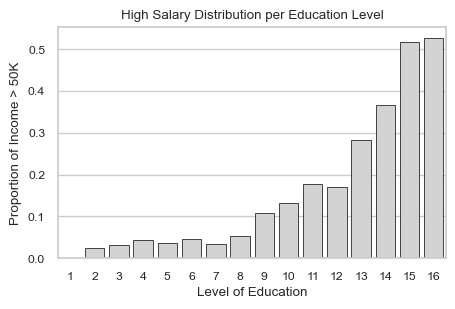

In [32]:
# Calculate the income distribution within each education length group
income_distribution = df_cleaned.groupby('education-num', observed=False)['above-50k'].mean()

# Plot the income distribution
plt.figure(figsize=(5, 3))
sns.barplot(x=income_distribution.index, y=income_distribution.values, color='lightgray', edgecolor='black', linewidth=0.5)
plt.xlabel('Level of Education')
plt.ylabel('Proportion of Income > 50K')
plt.title('High Salary Distribution per Education Level')
plt.show()

#### Question 4: How does gender impact salary?

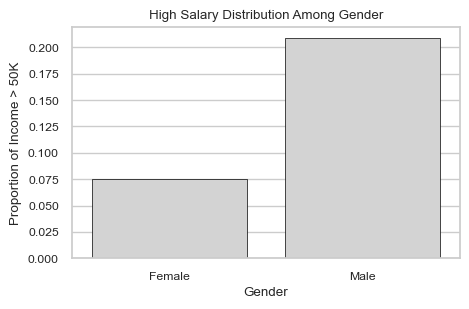

In [33]:
# Calculate the income distribution within each education length group
income_distribution = df_cleaned.groupby('sex', observed=False)['above-50k'].mean()
# Plot the income distribution
plt.figure(figsize=(5, 3))
#sns.barplot(x=income_distribution.index, y=income_distribution.values, palette='Set1', hue=income_distribution.index)
sns.barplot(x=income_distribution.index, y=income_distribution.values, color='lightgray', edgecolor='black', linewidth=0.5)
plt.xlabel('Gender')
plt.ylabel('Proportion of Income > 50K')
plt.title('High Salary Distribution Among Gender')
plt.show()

#### Question 5: How does race impact education level?

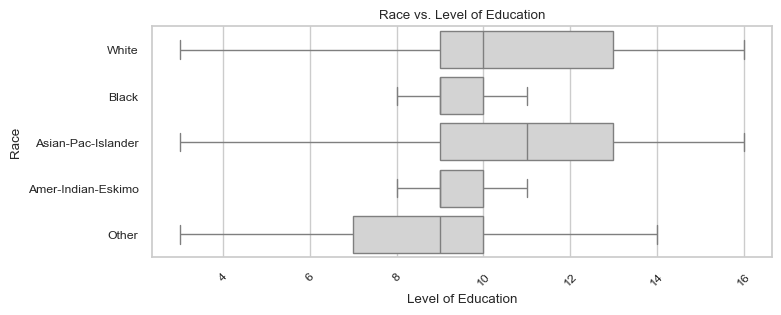

In [34]:
plt.figure(figsize=(8, 3))
sns.boxplot(y='race', x='education-num', data=df_cleaned, showfliers=False, color='lightgray')
plt.ylabel('Race')
plt.xlabel('Level of Education')
plt.title('Race vs. Level of Education')
plt.xticks(rotation=45)
plt.show()

### Question 6: Which native countries has the highest proportion of high income?

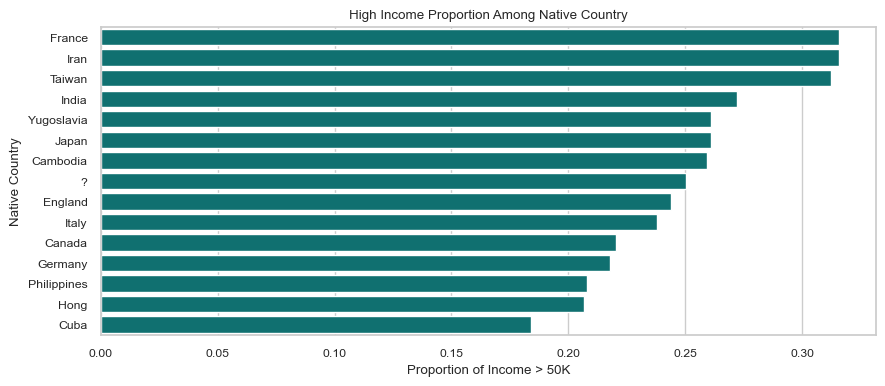

In [35]:
#Calculate the income distribution within each native country
income_distribution = df_cleaned.groupby('native-country', observed=False)['above-50k'].mean()
# Sort the income distribution in descending order and select the top 15
income_distribution = income_distribution.sort_values(ascending=False).head(15)
#income_distribution = income_distribution.sort_values(ascending=False)
plt.figure(figsize=(10, 4))
sns.barplot(y=income_distribution.index, x=income_distribution.values, orient='h', color='teal')
plt.ylabel('Native Country')
plt.xlabel('Proportion of Income > 50K')
plt.title('High Income Proportion Among Native Country')
plt.show()


The sample size might skew the result, lets look at how many occurrencies there are in the dataset of the top countries

In [36]:
pd.DataFrame(df_cleaned[df_cleaned['native-country'].isin([x for x in income_distribution.index if x != '?'])].groupby('native-country').size(), columns=['Count'])

,Count
native-country,
Cambodia,27
Canada,177
Cuba,136
England,123
France,38
Germany,202
Hong,29
India,147
Iran,57


#### Question 7: What is the distribution of net capital?

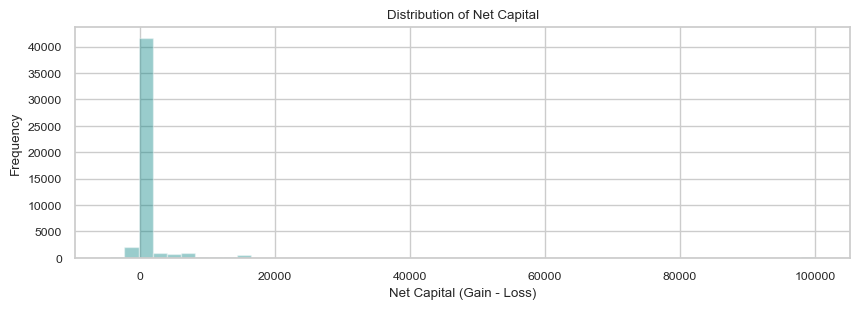

In [37]:
df_cleaned['net-capital'] = df_cleaned['capital-gain'] - df_cleaned['capital-loss']
plt.figure(figsize=(10, 3))
#For some reason histplot throws an exception in Kaggle, but in this case distplot produce the same result
#sns.histplot(df_cleaned['net-capital'], bins=50, kde=False, color='teal')
sns.distplot(df_cleaned['net-capital'], bins=50, kde=False, color='teal')
plt.xlabel('Net Capital (Gain - Loss)')
plt.ylabel('Frequency')
plt.title('Distribution of Net Capital')
plt.show()

The above plot shows that a large majority of the dataset i centered around zero. This feature is not going to be very useful to draw conclusions about correlations

#### Question 8: What does the distribution of education levels look like for different occupations?

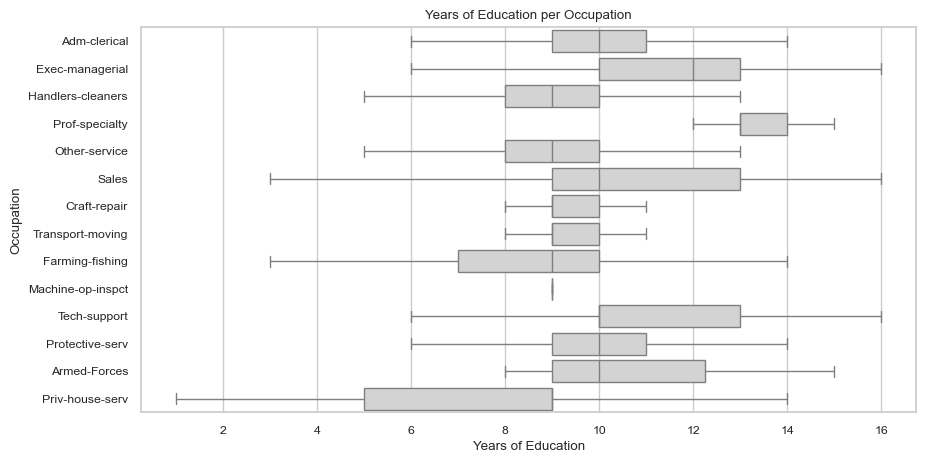

In [38]:
df_filtered = df_cleaned[df_cleaned['occupation'] != '?']
plt.figure(figsize=(10, 5))
sns.boxplot(x='education-num', y='occupation', data=df_filtered, showfliers=False, color='lightgray')
plt.xlabel('Years of Education')
plt.ylabel('Occupation')
plt.title('Years of Education per Occupation')
plt.show()

#### Question 9: Is there a racial bias in pay between white and black people with a bachelors degree?

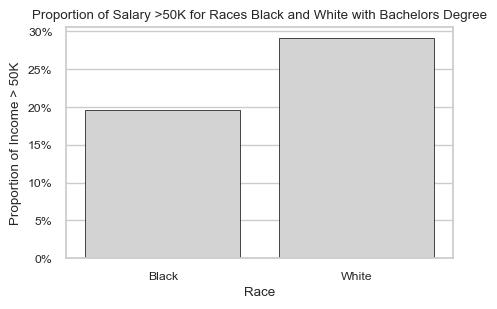

In [39]:
# Filter the DataFrame for races black and white where education is bachelor
df_bachelor = df_cleaned[(df_cleaned['education'] == 'Bachelors') & (df_cleaned['race'].isin(['White', 'Black']))]

# Calculate the proportion of salary >50k for each race
income_distribution_race = df_bachelor.groupby('race')['above-50k'].mean()

# Plot the income distribution
plt.figure(figsize=(5, 3))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
sns.barplot(x=income_distribution_race.index, y=income_distribution_race.values, color='lightgray', edgecolor='black', linewidth=0.5)
plt.xlabel('Race')
plt.ylabel('Proportion of Income > 50K')
plt.title('Proportion of Salary >50K for Races Black and White with Bachelors Degree')
plt.show()

#### Question 10: What is the age distribution of unmarried men vs women

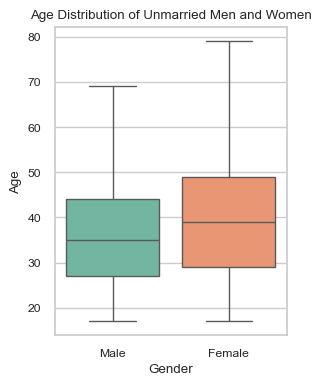

In [40]:
df_unmarried = df_cleaned[df_cleaned['relationship'].isin(['Unmarried', 'Not-in-family'])]

plt.figure(figsize=(3, 4))
sns.boxplot(x='sex', y='age', data=df_unmarried, showfliers=False, palette='Set2', hue='sex')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution of Unmarried Men and Women')
plt.show()

### Visual representation

Among the above questions, some of the more interesting to present visually are:
- Income distribution among different age groups
- Education vs. high income
- Gender vs. high income

The plots are simplistic but clear and do not draw attention from the data. Since there are plots woven in under each question, it makes little sense to repeat them in this section.

### Interactive application

Design a system where a user can input the education level and the
salary level (0 or 1), and the system generates a plot illustrating the
distribution of race and sex.

Implement effective exception handling by either creating custom ex-
ceptions or utilising standard ones

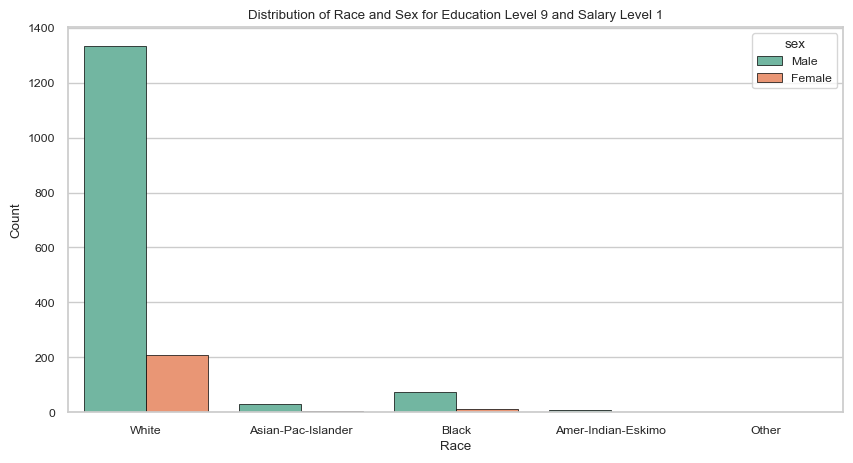

In [41]:
import seaborn as sns

import matplotlib.pyplot as plt

def plot_distribution(education_level, salary_level):
    try:
        # Validate salary_level input
        if salary_level not in [0, 1]:
            raise ValueError("Salary level must be 0 or 1.")
        
        # Filter the DataFrame based on user input
        df_filtered = df_cleaned[(df_cleaned['education-num'] == education_level) & (df_cleaned['above-50k'] == salary_level)]
        
        if df_filtered.empty:
            raise ValueError("No data available for the given education level and salary level.")
        
        # Plot the distribution of race and sex
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df_filtered, x='race', hue='sex', palette='Set2', edgecolor='black', linewidth=0.5)
        plt.xlabel('Race')
        plt.ylabel('Count')
        plt.title(f'Distribution of Race and Sex for Education Level {education_level} and Salary Level {salary_level}')
        plt.show()
    
    except ValueError as e:
        print(f"Error: {e}")

# Example usage
education_level = int(input("Enter the education level (as a number): "))
salary_level = int(input("Enter the salary level (0 or 1): "))
plot_distribution(education_level, salary_level)